In [1]:
import random 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


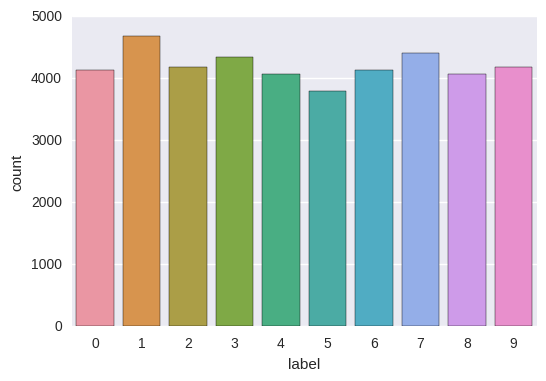

In [4]:
sns.countplot(data = df,x = 'label')

In [505]:
layer = 3
layer_neurons = [784, 60, 10]

In [506]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

def sigmoidPrime(z):
    return sigmoid(z)*(1-sigmoid(z))


def createWeights():
    weights = []
    constant = []
    for i in xrange(1,layer):
        x = np.random.randn(layer_neurons[i],layer_neurons[i-1])
        weights.append(x)
        constant.append(np.random.randn(layer_neurons[i]))                   
    return weights,constant

def feedForward(weights, constant, a):
    x = np.array(a)
    for i in xrange(1,layer):
        x = np.dot(weights[i-1], x)+constant[i-1]
        x = sigmoid(x)
    return x    

def SGD(x, y, weights, constant, iteratoins, alpha):
    n = x.shape[0]
    #for i in xrange(iteratoins):
    for j in xrange(n):
            #a = feedForward(weights, constant, x[j])
            #b = np.array(x[j]) 
            #a[y[j]] = a[y[j]] - 1.0
        backProp(weights, constant, layer, 0, x[j], y[j][0], alpha*(1.0/n))

def backProp(weights, constant, layer, curr, a, error, alpha):
    b =  np.dot(weights[curr], a)+constant[curr]
    c = sigmoid(b)    

    if curr == layer-2:
        b[error] = b[error] - 1.0
        x = b * sigmoidPrime(b)
        #print error.shape,weights[curr].shape, a.shape, b.shape
        constant[curr] -= alpha*x
        sub = np.dot(np.array([x]).transpose(),np.array([a]))
        weights[curr] = weights[curr] - alpha * sub
        return x
    
    delta = backProp(weights, constant, layer, curr+1, c, error, alpha)
    #print weights[curr].shape,b.shape,a.shape,delta.shape
    #print delta.shape,weights[curr+1].shape
    delta = weights[curr+1].transpose() * delta
    delta = delta.transpose().sum(axis = 0)
    delta = delta * sigmoidPrime(b)
    constant[curr] -= alpha * delta                    
    weights[curr] = weights[curr] - alpha * np.dot(np.array([delta]).transpose(), np.array([a]))
    #print  delta.shape,np.array([a]).shape,weights[curr].shape,np.dot(delta.transpose(),np.array([a])).shape
    return delta

def neuralNetwork(data, alpha, batch, iterations, weights, constant):
    data = np.array(data)
    for i in range(iterations):
        print i
        np.random.shuffle(data)
        y, x=  np.hsplit(data,np.array([1,])) 
        for i in range(0,data.shape[0],batch):
            SGD(x[i:batch+i], y[i:batch+i], weights, constant, 30, alpha)
            

In [507]:
weights, constant = createWeights()

In [562]:
neuralNetwork(df,50.0,df.shape[0],1,weights, constant)

0


In [563]:
x = 0
for i in range(1000):
    a = feedForward(weights, constant,df.iloc[i][1:])
    a = np.argmax(a)
    if a == df.iloc[i]['label']:
        x += 1
        
print x/float(1000)*100        

82.2
